In [4]:
import pandas as pd
# input data 읽기
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [5]:
# Data 5개만 보기
train.head()


'''
- SibSp : 동반한 형제자매, 배우자 수

- Patch : 동반한 부모, 자식 수

- Ticket : 티켓의 고유 넘버

- Fare 티켓의 요금

- Cabin : 객실 번호

- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

NaN = Not a Number > missing field > preprocessing
'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()
# Survived Field 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
train.info()
# non-nul field 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum()
# 해당 자료를 보고 어떻게 해야할 지 판한해야 함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [32]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

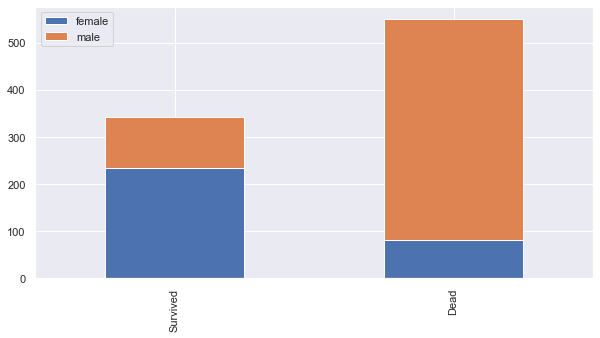

In [33]:
bar_chart('Sex')

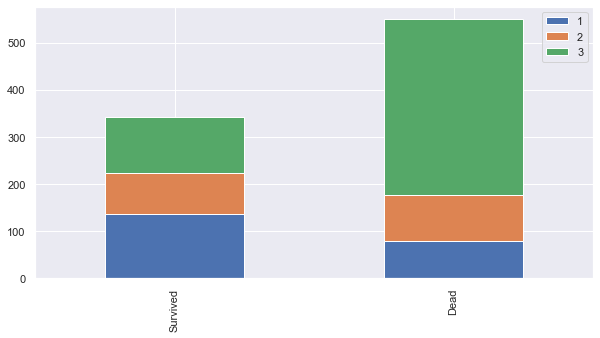

In [35]:
bar_chart('Pclass')

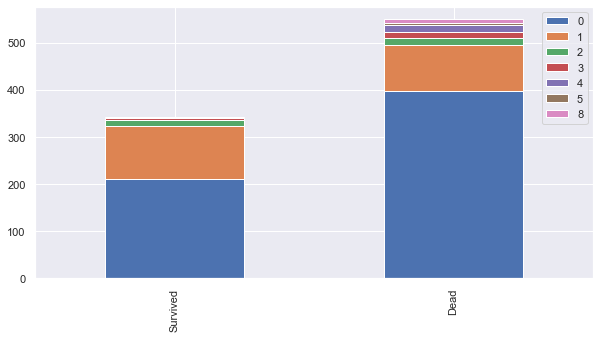

In [36]:
bar_chart('SibSp')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [39]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Mme           1
Countess      1
Ms            1
Don           1
Capt          1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [40]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [42]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Mlle":3, 
                 "Major":3, "Col":3, "Sir":3, "Mme":3, "Countess":1, "Ms":1, "Don":1,
                 "Capt":1, "Jonkheer":3, "Lady":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


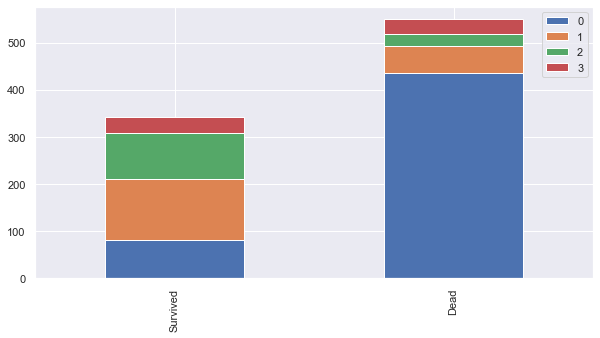

In [43]:
bar_chart('Title')

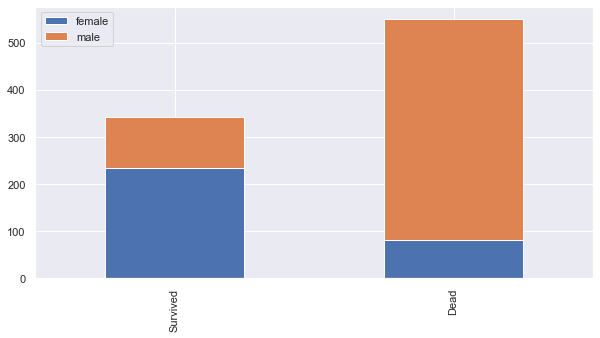

In [45]:
bar_chart('Sex')

In [46]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [47]:
sex_mapping ={"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


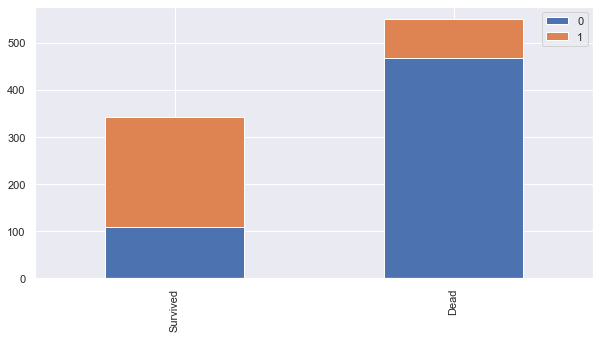

In [49]:
bar_chart('Sex')

In [50]:
# Miassing Information
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

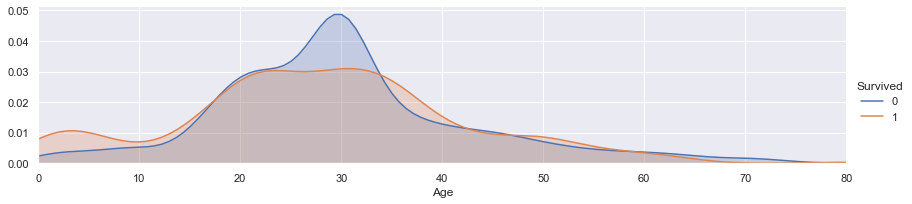

In [53]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

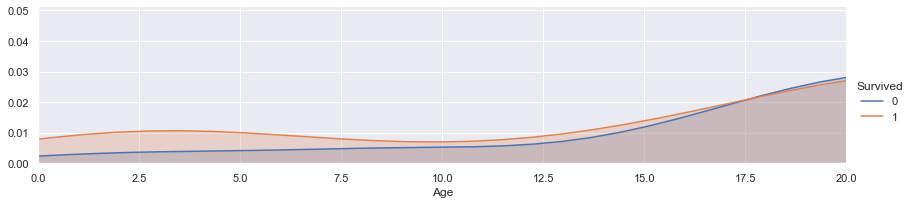

In [54]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

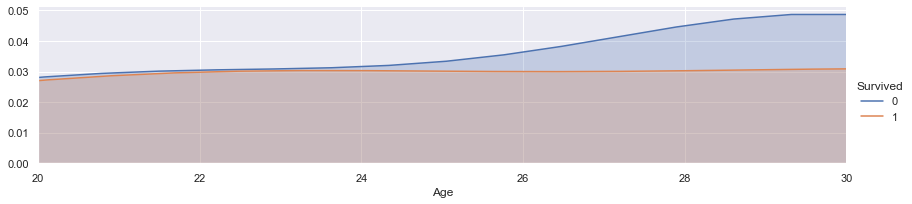

In [55]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

In [57]:
'''
feature vector map:
child : 0 
young : 1
adult : 2
mid-age : 3
senor : 4
'''
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 66, 'Age'] = 4

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [59]:
test_head()

NameError: name 'test_head' is not defined

In [60]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2.0


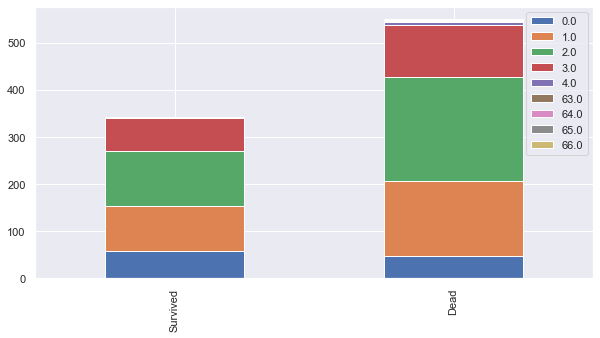

In [61]:
bar_chart('Age')

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        417 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


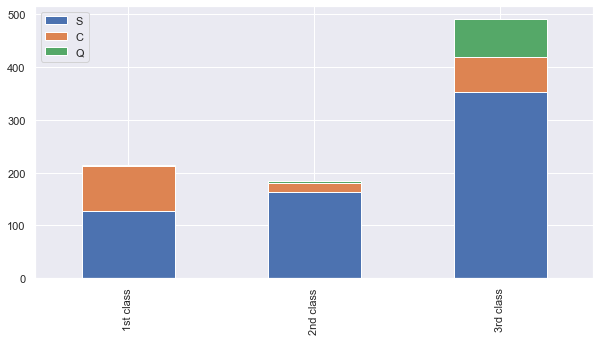

In [66]:
# Embarked
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [67]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [69]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [70]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [73]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [74]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

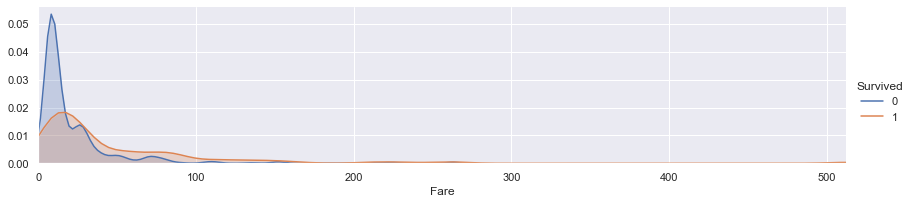

In [75]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(10.0, 100.0)

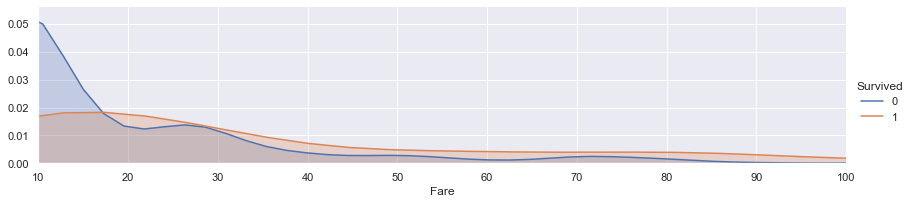

In [80]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(10,100)

(10.0, 20.0)

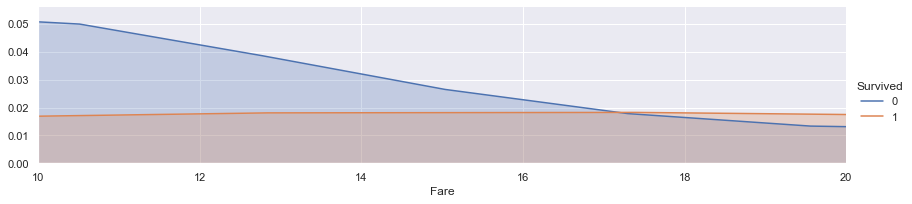

In [81]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(10,20)

(0.0, 20.0)

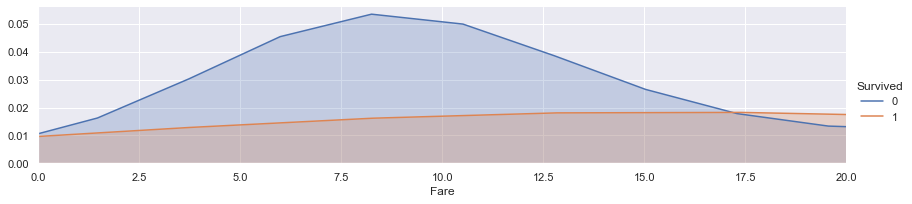

In [79]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

In [82]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [85]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [87]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [88]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F33            3
              ..
E46            1
C45            1
C32            1
B50            1
E77            1
Name: Cabin, Length: 147, dtype: int64

In [89]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

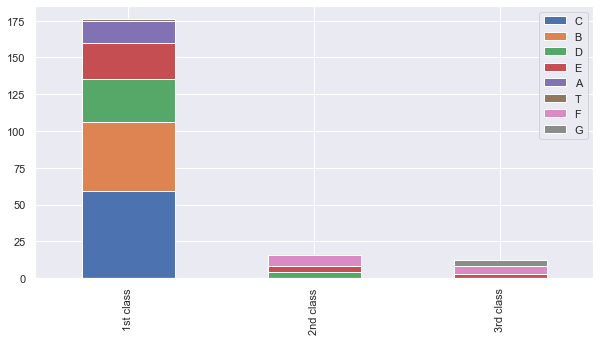

In [90]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [97]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [98]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [99]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


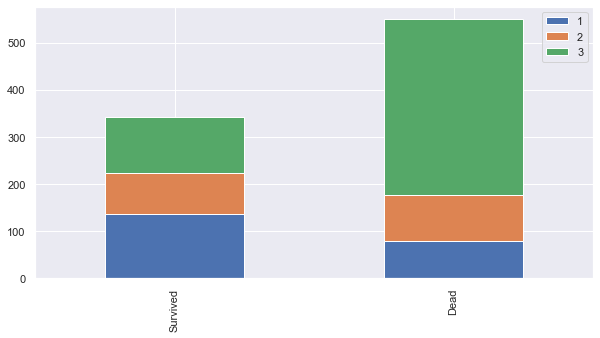

In [94]:
bar_chart('Pclass')

In [95]:
train['FamilySize'] = train['SibSp'] + train["Parch"] + 1
test['FamilySize'] = test['SibSp'] + test["Parch"] + 1

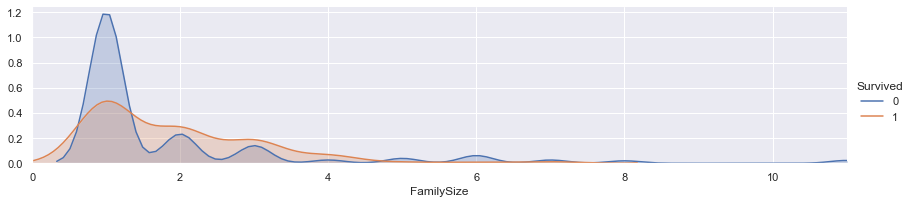

In [96]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.show()

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 90.6+ KB


In [101]:
train.heap()

AttributeError: 'DataFrame' object has no attribute 'heap'

In [102]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 90.6+ KB


In [104]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [105]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10: 3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [108]:
train_test_data.info()

AttributeError: 'list' object has no attribute 'info'

In [109]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,0.8


In [155]:
train['Survived'] = train['Survived'].astype('float')
train['Pclass'] = train['Pclass'].astype('float')
train['Sex'] = train['Sex'].astype('float')
train['SibSp'] = train['SibSp'].astype('float')
train['Parch'] = train['Parch'].astype('float')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Sex          891 non-null    float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 90.6+ KB


In [162]:
'''
pclass 2
sex 3
age 4
sibsp 5
parch 6
Fare 8
'''
x_data = train.values[:,[2, 3, 4, 5, 6, 8]]
y_data = train.values[:,[1]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [163]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

In [164]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 255)               1785      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 딥러닝 모델 가시화 기능 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 801 samples, validate on 90 samples
Epoch 1/500
801/801 [==============================] - 0s 27us/step - loss: 0.1132 - accuracy: 0.8489 - val_loss: 0.1416 - val_accuracy: 0.8000
Epoch 2/500
801/801 [==============================] - 0s 26us/step - loss: 0.1136 - accuracy: 0.8427 - val_loss: 0.1432 - val_accuracy: 0.8000
Epoch 3/500
801/801 [==============================] - 0s 24us/step - loss: 0.1134 - accuracy: 0.8502 - val_loss: 0.1424 - val_accuracy: 0.8000
Epoch 4/500
801/801 [==============================] - 0s 24us/step - loss: 0.1134 - accuracy: 0.8502 - val_loss: 0.1437 - val_accuracy: 0.8000
Epoch 5/500
801/801 [==============================] - 0s 24us/step - loss: 0.1148 - accuracy: 0.8452 - val_loss: 0.1426 - val_accuracy: 0.8000
Epoch 6/500
801/801 [==============================] - 0s 24us/step - loss: 0.1161 - accuracy: 0.8390 - val_loss: 0.1404 - val_accuracy: 0.8000
Epoch 7/500
801/801 [==============================] - 0s 24us/step - loss: 0.1139 - accura

801/801 [==============================] - 0s 22us/step - loss: 0.1143 - accuracy: 0.8489 - val_loss: 0.1395 - val_accuracy: 0.8111
Epoch 58/500
801/801 [==============================] - 0s 22us/step - loss: 0.1125 - accuracy: 0.8502 - val_loss: 0.1394 - val_accuracy: 0.8111
Epoch 59/500
801/801 [==============================] - 0s 22us/step - loss: 0.1124 - accuracy: 0.8502 - val_loss: 0.1395 - val_accuracy: 0.8000
Epoch 60/500
801/801 [==============================] - 0s 24us/step - loss: 0.1130 - accuracy: 0.8464 - val_loss: 0.1379 - val_accuracy: 0.8111
Epoch 61/500
801/801 [==============================] - 0s 21us/step - loss: 0.1140 - accuracy: 0.8439 - val_loss: 0.1428 - val_accuracy: 0.8000
Epoch 62/500
801/801 [==============================] - 0s 22us/step - loss: 0.1126 - accuracy: 0.8527 - val_loss: 0.1415 - val_accuracy: 0.8000
Epoch 63/500
801/801 [==============================] - 0s 24us/step - loss: 0.1123 - accuracy: 0.8502 - val_loss: 0.1402 - val_accuracy: 0.800

801/801 [==============================] - 0s 22us/step - loss: 0.1121 - accuracy: 0.8527 - val_loss: 0.1410 - val_accuracy: 0.8000
Epoch 114/500
801/801 [==============================] - 0s 22us/step - loss: 0.1124 - accuracy: 0.8427 - val_loss: 0.1422 - val_accuracy: 0.8222
Epoch 115/500
801/801 [==============================] - 0s 22us/step - loss: 0.1131 - accuracy: 0.8527 - val_loss: 0.1410 - val_accuracy: 0.8000
Epoch 116/500
801/801 [==============================] - 0s 23us/step - loss: 0.1129 - accuracy: 0.8502 - val_loss: 0.1428 - val_accuracy: 0.8111
Epoch 117/500
801/801 [==============================] - 0s 22us/step - loss: 0.1156 - accuracy: 0.8315 - val_loss: 0.1394 - val_accuracy: 0.8111
Epoch 118/500
801/801 [==============================] - 0s 22us/step - loss: 0.1127 - accuracy: 0.8502 - val_loss: 0.1403 - val_accuracy: 0.8000
Epoch 119/500
801/801 [==============================] - 0s 24us/step - loss: 0.1113 - accuracy: 0.8464 - val_loss: 0.1417 - val_accuracy:

801/801 [==============================] - 0s 24us/step - loss: 0.1128 - accuracy: 0.8439 - val_loss: 0.1400 - val_accuracy: 0.8222
Epoch 170/500
801/801 [==============================] - 0s 22us/step - loss: 0.1124 - accuracy: 0.8527 - val_loss: 0.1400 - val_accuracy: 0.8111
Epoch 171/500
801/801 [==============================] - ETA: 0s - loss: 0.0705 - accuracy: 0.90 - 0s 24us/step - loss: 0.1111 - accuracy: 0.8489 - val_loss: 0.1415 - val_accuracy: 0.8111
Epoch 172/500
801/801 [==============================] - 0s 23us/step - loss: 0.1153 - accuracy: 0.8414 - val_loss: 0.1497 - val_accuracy: 0.8111
Epoch 173/500
801/801 [==============================] - 0s 22us/step - loss: 0.1126 - accuracy: 0.8514 - val_loss: 0.1450 - val_accuracy: 0.8111
Epoch 174/500
801/801 [==============================] - 0s 24us/step - loss: 0.1133 - accuracy: 0.8414 - val_loss: 0.1447 - val_accuracy: 0.8111
Epoch 175/500
801/801 [==============================] - 0s 21us/step - loss: 0.1117 - accuracy:

Epoch 225/500
801/801 [==============================] - 0s 22us/step - loss: 0.1130 - accuracy: 0.8527 - val_loss: 0.1395 - val_accuracy: 0.8111
Epoch 226/500
801/801 [==============================] - 0s 23us/step - loss: 0.1126 - accuracy: 0.8439 - val_loss: 0.1382 - val_accuracy: 0.8000
Epoch 227/500
801/801 [==============================] - 0s 22us/step - loss: 0.1109 - accuracy: 0.8564 - val_loss: 0.1386 - val_accuracy: 0.8000
Epoch 228/500
801/801 [==============================] - 0s 23us/step - loss: 0.1108 - accuracy: 0.8552 - val_loss: 0.1381 - val_accuracy: 0.8111
Epoch 229/500
801/801 [==============================] - 0s 21us/step - loss: 0.1104 - accuracy: 0.8527 - val_loss: 0.1381 - val_accuracy: 0.8000
Epoch 230/500
801/801 [==============================] - 0s 23us/step - loss: 0.1103 - accuracy: 0.8527 - val_loss: 0.1389 - val_accuracy: 0.8000
Epoch 231/500
801/801 [==============================] - 0s 22us/step - loss: 0.1100 - accuracy: 0.8539 - val_loss: 0.1389 -

801/801 [==============================] - 0s 22us/step - loss: 0.1108 - accuracy: 0.8527 - val_loss: 0.1390 - val_accuracy: 0.7889
Epoch 282/500
801/801 [==============================] - 0s 25us/step - loss: 0.1148 - accuracy: 0.8402 - val_loss: 0.1387 - val_accuracy: 0.8000
Epoch 283/500
801/801 [==============================] - 0s 21us/step - loss: 0.1098 - accuracy: 0.8552 - val_loss: 0.1379 - val_accuracy: 0.8000
Epoch 284/500
801/801 [==============================] - 0s 22us/step - loss: 0.1103 - accuracy: 0.8464 - val_loss: 0.1382 - val_accuracy: 0.8000
Epoch 285/500
801/801 [==============================] - 0s 21us/step - loss: 0.1097 - accuracy: 0.8514 - val_loss: 0.1361 - val_accuracy: 0.8000
Epoch 286/500
801/801 [==============================] - 0s 22us/step - loss: 0.1097 - accuracy: 0.8539 - val_loss: 0.1353 - val_accuracy: 0.8000
Epoch 287/500
801/801 [==============================] - 0s 22us/step - loss: 0.1108 - accuracy: 0.8452 - val_loss: 0.1364 - val_accuracy:

801/801 [==============================] - 0s 22us/step - loss: 0.1088 - accuracy: 0.8552 - val_loss: 0.1296 - val_accuracy: 0.8111
Epoch 338/500
801/801 [==============================] - 0s 22us/step - loss: 0.1086 - accuracy: 0.8527 - val_loss: 0.1298 - val_accuracy: 0.8111
Epoch 339/500
801/801 [==============================] - 0s 24us/step - loss: 0.1085 - accuracy: 0.8477 - val_loss: 0.1298 - val_accuracy: 0.8111
Epoch 340/500
801/801 [==============================] - 0s 21us/step - loss: 0.1170 - accuracy: 0.8365 - val_loss: 0.1263 - val_accuracy: 0.8000
Epoch 341/500
801/801 [==============================] - 0s 23us/step - loss: 0.1175 - accuracy: 0.8439 - val_loss: 0.1349 - val_accuracy: 0.8111
Epoch 342/500
801/801 [==============================] - 0s 22us/step - loss: 0.1129 - accuracy: 0.8489 - val_loss: 0.1327 - val_accuracy: 0.8000
Epoch 343/500
801/801 [==============================] - 0s 21us/step - loss: 0.1137 - accuracy: 0.8514 - val_loss: 0.1325 - val_accuracy:

801/801 [==============================] - 0s 23us/step - loss: 0.1083 - accuracy: 0.8539 - val_loss: 0.1306 - val_accuracy: 0.7889
Epoch 394/500
801/801 [==============================] - 0s 24us/step - loss: 0.1078 - accuracy: 0.8564 - val_loss: 0.1303 - val_accuracy: 0.7889
Epoch 395/500
801/801 [==============================] - 0s 22us/step - loss: 0.1111 - accuracy: 0.8439 - val_loss: 0.1375 - val_accuracy: 0.8000
Epoch 396/500
801/801 [==============================] - 0s 22us/step - loss: 0.1112 - accuracy: 0.8477 - val_loss: 0.1311 - val_accuracy: 0.8111
Epoch 397/500
801/801 [==============================] - 0s 24us/step - loss: 0.1106 - accuracy: 0.8514 - val_loss: 0.1305 - val_accuracy: 0.8111
Epoch 398/500
801/801 [==============================] - 0s 22us/step - loss: 0.1089 - accuracy: 0.8527 - val_loss: 0.1307 - val_accuracy: 0.8000
Epoch 399/500
801/801 [==============================] - 0s 24us/step - loss: 0.1085 - accuracy: 0.8539 - val_loss: 0.1304 - val_accuracy:

801/801 [==============================] - 0s 22us/step - loss: 0.1082 - accuracy: 0.8477 - val_loss: 0.1316 - val_accuracy: 0.8000
Epoch 450/500
801/801 [==============================] - 0s 23us/step - loss: 0.1073 - accuracy: 0.8589 - val_loss: 0.1308 - val_accuracy: 0.8000
Epoch 451/500
801/801 [==============================] - 0s 24us/step - loss: 0.1086 - accuracy: 0.8539 - val_loss: 0.1299 - val_accuracy: 0.8000
Epoch 452/500
801/801 [==============================] - 0s 24us/step - loss: 0.1068 - accuracy: 0.8564 - val_loss: 0.1284 - val_accuracy: 0.8111
Epoch 453/500
801/801 [==============================] - 0s 23us/step - loss: 0.1074 - accuracy: 0.8564 - val_loss: 0.1288 - val_accuracy: 0.8000
Epoch 454/500
801/801 [==============================] - 0s 24us/step - loss: 0.1062 - accuracy: 0.8614 - val_loss: 0.1301 - val_accuracy: 0.8222
Epoch 455/500
801/801 [==============================] - 0s 23us/step - loss: 0.1084 - accuracy: 0.8514 - val_loss: 0.1300 - val_accuracy:

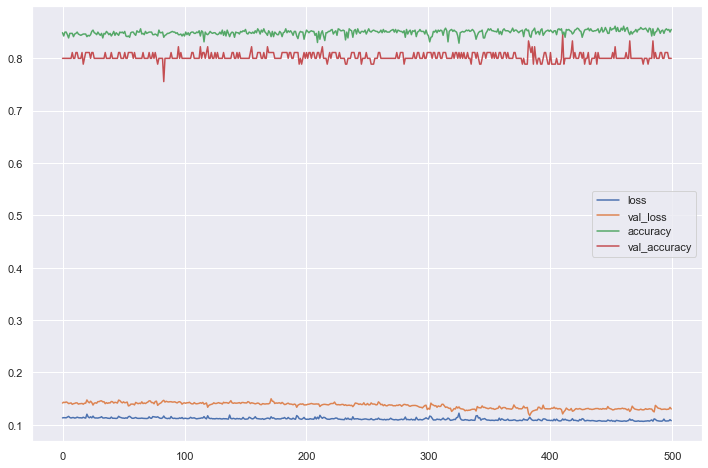

In [167]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3.0,0.0,1.0,1.0,0.0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1.0,1.0,1.0,3.0,1.0,0.0,PC 17599,2.0,0.8,1,2,0.4
2,3,1.0,3.0,1.0,1.0,0.0,0.0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1.0,1.0,1.0,2.0,1.0,0.0,113803,2.0,0.8,0,2,0.4
4,5,0.0,3.0,0.0,2.0,0.0,0.0,373450,0.0,2.0,0,0,0.0


In [173]:

'''
pclass 2
sex 3
age 4
sibsp 5
parch 6
Fare 8
'''

dicaprio = np.array([3.,0.,1.,0.,0.,0.]).reshape(1,6)
winslet = np.array([1.,1.,1.,1.,2.,3.]).reshape(1,6)

In [175]:
model.predict(dicaprio)

array([[0.06792052]], dtype=float32)

In [176]:
model.predict(winslet)

array([[0.9193358]], dtype=float32)